In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyrealsense2 as rs
from IPython.display import clear_output

print("Env ready")

Env ready


In [21]:
# Create Pipeline
pipe = rs.pipeline()
cfg = rs.config()
print("Pipeline is created")

Pipeline is created


In [22]:
# Find Realsense Device
print("Searching for Realsense Device")
selected_device = []

for d in rs.context().devices:
    selected_device.append(d)
    print("Device found: ", d.get_info(rs.camera_info.name))
if not selected_device:
    print("No Realsense Device found")
    exit(0)


Searching for Realsense Device
Device found:  Intel RealSense D415


In [23]:
# Find RGB and Depth Sensor
rgb_sensor = depth_sensor = None

for device in selected_device:
    print("Required sensor for device: ", device.get_info(rs.camera_info.name))
    for s in device.sensors:
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - RGB sensor found")
            rgb_sensor = s
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            print(" - Depth sensor found")
            depth_sensor = s

Required sensor for device:  Intel RealSense D415
 - Depth sensor found
 - RGB sensor found


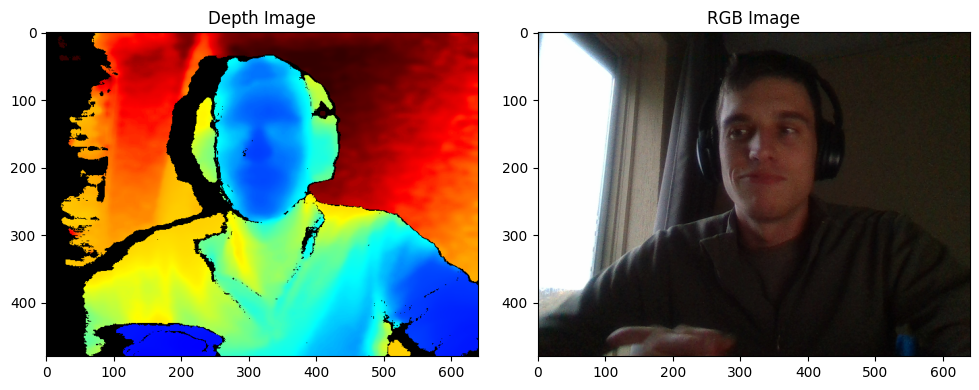

Done!


In [24]:
# Displaying Depth and Color Frames
colorizer = rs.colorizer()
profile = pipe.start(cfg)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
title = ["Depth Image", "RGB Image"]

for _ in range(10):
    frameset = pipe.wait_for_frames()

for _ in range(5):
    frameset = pipe.wait_for_frames()
    depth_frame = frameset.get_depth_frame()
    color_frame = frameset.get_color_frame()

    colorized_stream = []

    if depth_frame:
        colorized_stream.append(np.asanyarray(colorizer.colorize(depth_frame).get_data()))
    if color_frame:
        colorized_stream.append(np.asanyarray(color_frame.get_data()))
    
    for i, ax in enumerate(axs.flatten()):
        if i >= len(colorized_stream): continue
        plt.sca(ax)
        plt.imshow(colorized_stream[i])
        plt.title(title[i])

    clear_output(wait=True)
    plt.tight_layout()
    plt.pause(1)
pipe.stop()
print("Done!")